# Small Image Classification Using Convolutional Neural Network (CNN)

In [ ]:
# we will classify small images cifar10 dataset from tensorflow keras datasets. 
# There are total 10 classes, will use CNN for classification

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# When we call this load data method , we return (x_train y_train) (x_test y_test)

In [5]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
# Training samples are 50k each sample is 32 by 32 image and 3 is for RGB chanels

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
# To check each of the training samples - we get 3d array

In [10]:
X_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [ ]:
# Will plot this to see how this looks - can use imshow function in matplotlib

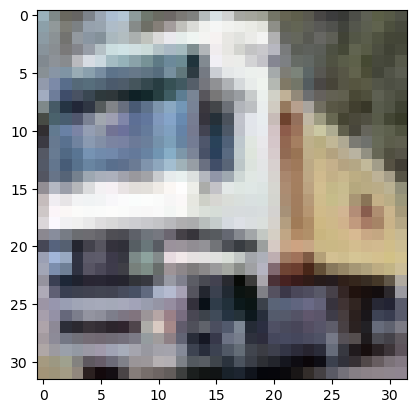

In [9]:
plt.imshow(X_train[1])

In [ ]:
# Image is very big - so to control the size of image - we use figure function and give figuresize

In [11]:
 # plt.figure(figsize = (15,2))

<Figure size 1500x200 with 0 Axes>

<Figure size 1500x200 with 0 Axes>

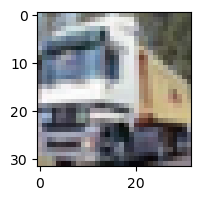

In [12]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[1])

In [16]:
X_test.shape

(10000, 32, 32, 3)

In [13]:
y_train.shape

(50000, 1)

In [ ]:
# We quickly look at first 5 samples

In [15]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
# It is 2d array and we dont want it so we will reshape this y_train for that we use reshape function
# For the dimension we dont want to change we use -1 and 2nd dimesnsion we want to flattern it.

In [17]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
# Defined the list variable called classes 

In [18]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [19]:
classes[9]

'truck'

In [ ]:
# Creating function named as plot_sample and it will take x,y,index and printing that paricular image sample.
# On x_label we want to print the label whether its a ship or a truck n so .. we use this classes variable in X_label and that 
# Index will be y of index.

In [20]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

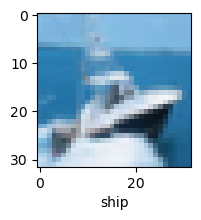

In [24]:
plot_sample(X_train, y_train, 8)

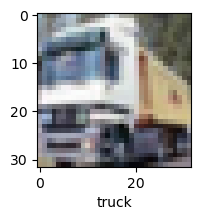

In [25]:
plot_sample(X_train, y_train, 1)

In [ ]:
# We can check various samples like this 

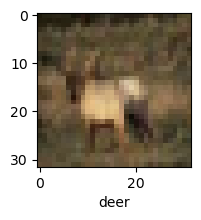

In [26]:
plot_sample(X_train, y_train, 3)

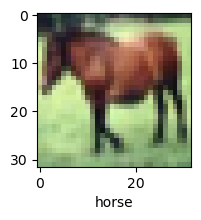

In [27]:
plot_sample(X_train, y_train, 7)

In [ ]:
# Normalizing the training data

In [28]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# building a convolutional neural network to train our images

In [36]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [30]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 111s 70ms/step - loss: 1.4554 - accuracy: 0.4774
Epoch 2/10
1563/1563 [==============================] - 131s 84ms/step - loss: 1.0995 - accuracy: 0.6133
Epoch 3/10
1563/1563 [==============================] - 125s 80ms/step - loss: 0.9593 - accuracy: 0.6653
Epoch 4/10
1563/1563 [==============================] - 98s 63ms/step - loss: 0.8727 - accuracy: 0.6948
Epoch 5/10
1563/1563 [==============================] - 118s 75ms/step - loss: 0.8053 - accuracy: 0.7184
Epoch 6/10
1563/1563 [==============================] - 110s 70ms/step - loss: 0.7436 - accuracy: 0.7412
Epoch 7/10
1563/1563 [==============================] - 111s 71ms/step - loss: 0.6881 - accuracy: 0.7597
Epoch 8/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.6395 - accuracy: 0.7749
Epoch 9/10
1563/1563 [==============================] - 127s 81ms/step - loss: 0.5994 - accuracy: 0.7895
Epoch 10/10
1563/1563 [==============================] -

In [32]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 7s 20ms/step - loss: 0.9287 - accuracy: 0.7030


[0.9286538362503052, 0.703000009059906]

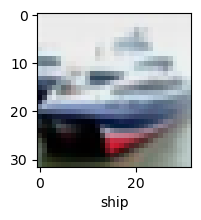

In [38]:
y_test = y_test .reshape(-1,)
plot_sample(X_test, y_test, 1)

In [33]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 7s 22ms/step


array([[8.9121098e-04, 2.4707979e-06, 7.0161669e-04, 9.5692170e-01,
        2.4227485e-05, 2.7843243e-02, 1.1913035e-02, 5.4825283e-05,
        1.1509636e-03, 4.9675081e-04],
       [1.3946156e-03, 9.2985946e-01, 2.8903730e-06, 1.4003001e-06,
        2.2965827e-08, 6.8566564e-08, 2.5288699e-07, 1.7179091e-09,
        6.1912730e-02, 6.8284376e-03],
       [3.3410183e-01, 3.8482255e-01, 7.1124514e-03, 1.0713338e-02,
        1.9015609e-03, 1.9066801e-03, 2.3029480e-04, 1.6191585e-02,
        2.0787756e-01, 3.5142198e-02],
       [8.9582640e-01, 2.9553421e-02, 2.1576416e-03, 3.1023761e-04,
        5.3199550e-05, 3.3767901e-05, 5.8100472e-04, 2.1939313e-05,
        7.1374267e-02, 8.8108201e-05],
       [3.0970007e-06, 6.3060253e-07, 1.3792424e-03, 4.7589015e-02,
        1.6828889e-01, 3.0046708e-03, 7.7972925e-01, 1.5022950e-06,
        2.3170348e-06, 1.3568817e-06]], dtype=float32)

In [34]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 1, 0, 6]

In [39]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

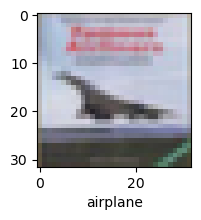

In [40]:
plot_sample(X_test, y_test,3)

In [41]:
classes[y_classes[3]]

'airplane'

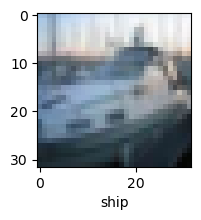

In [42]:
plot_sample(X_test, y_test,2)

In [43]:
classes[y_classes[2]]

'automobile'

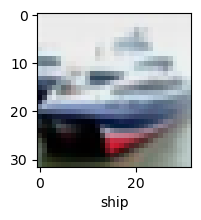

In [46]:
plot_sample(X_test, y_test,1)

In [47]:
classes[y_classes[1]]

'automobile'